<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [2]:
# ANSWER
#titanic_csv = '../DATA/titanic_train.csv'
#titanic_csv = "C:\Users\isabe\Documents\Institute of Data\IOD Data\titanic_train.csv"


titanic = pd.read_csv('titanic_train.csv', index_col='PassengerId')


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [3]:
# ANSWER

# Check for first 5 rows

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for df info to be able to see datatypes, shape of the data and general idea of if there is any missing values. .info() gives a lot of insights.

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# To be able to exact numbers of missing values... .isnull() alone would only return a boolean df

titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
# Check for statistical values with .T

titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


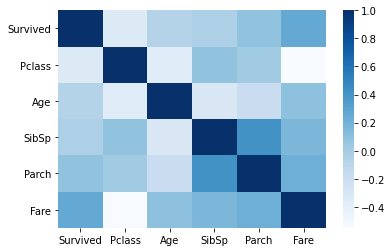

In [7]:
# Check correlations between numerical values

sns.heatmap(titanic.corr(), cmap = 'Blues')
plt.show()

In [8]:
# Some visualizations. Vincent's functions

def bar_chart(train, feature):
    survived = train[train['Survived']==1][feature].value_counts(normalize=True)*100
    dead = train[train['Survived']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.title('Survival distribution graph on %s' % feature)
    plt.show()

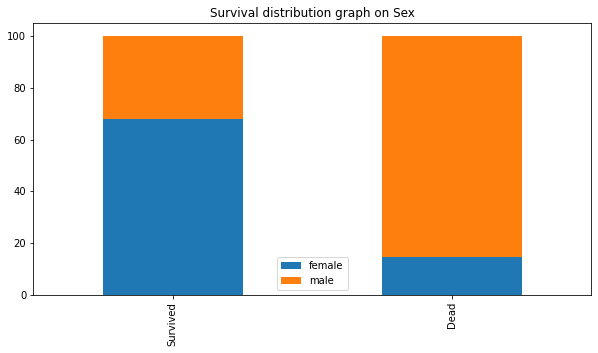

In [9]:
# Survival vs Sex
bar_chart(titanic, 'Sex')

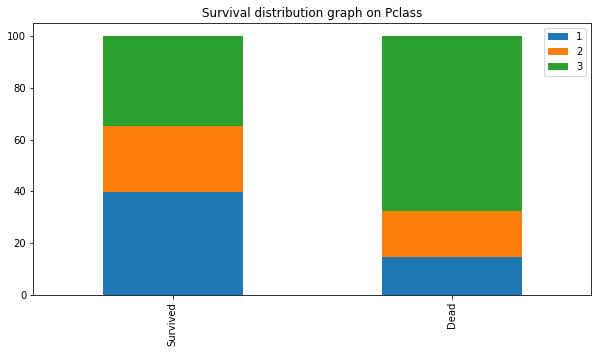

In [10]:
# Survival vs Pclass
bar_chart(titanic, 'Pclass')

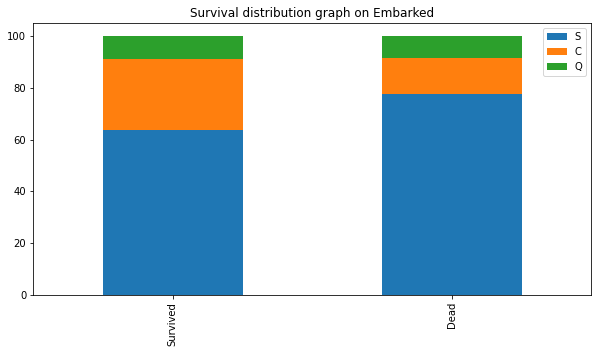

In [11]:
# Survival vs Embarked
bar_chart(titanic, 'Embarked')

In [12]:
def fgp(df, var):
    facet = sns.FacetGrid(df, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.add_legend()
    plt.show();

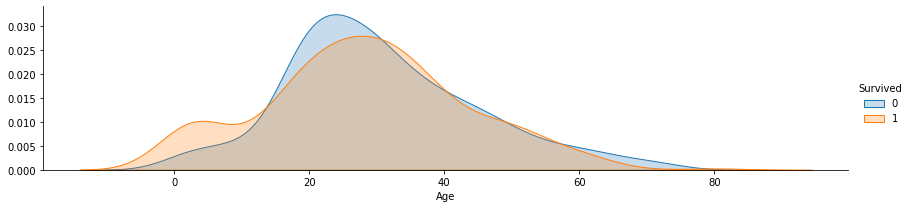

In [13]:
# Facetgrid Plot survival vs age
fgp(titanic, 'Age')

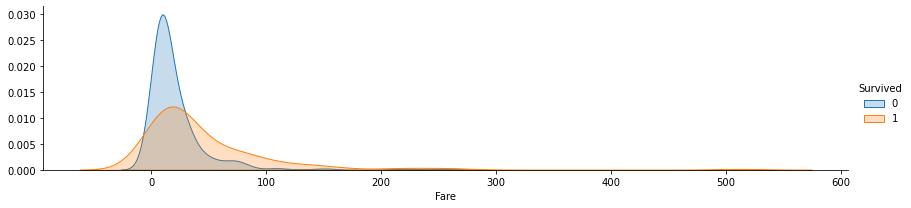

In [14]:
# Facetgrid Plot survival vs fare
fgp(titanic, 'Fare')

### Before setting target values and move on with predictions we should check for missing values and fill them.

In [15]:
# First, check on missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 1) Filling missing values for age

In [16]:
# Fill missing values for Age column, aggregations will be done with the sex of the passangers so we should map sex to a numeric type
titanic['Sex_map'] = titanic.Sex.map({'male': 1, 'female': 0})

In [17]:
# Create Age_Fill column with a apply- lambda function. 
titanic['Age_Fill'] = titanic['Age'].groupby([titanic['Pclass'], titanic['Sex']]).apply(lambda x: x.fillna(x.mean()))

#https://stackoverflow.com/questions/63650987/how-to-fill-nan-values-by-imputation-in-the-titanic-age-column
# Alternative to above which saves the hassle of creating a new column;
#titanic['Age'].fillna(titanic.groupby(['Sex', 'Pclass'])['Age'].transform('mean'), inplace = True)

In [18]:
# Inspecting the new column and missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Sex_map       0
Age_Fill      0
dtype: int64

### 2) Filling missing values for embarked

In [19]:
# Since we are only missing 2 values for embarked, we can just fill the missing values with the most common embarked value.
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# Most common is S so missing values will be filled with S.
titanic['Embarked'].fillna('S', inplace = True)

In [21]:
# Sanity check
titanic['Embarked'].isnull().sum()

0

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Sex_map   891 non-null    int64  
 12  Age_Fill  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 137.5+ KB


In [23]:
# ANSWER

X = titanic[['Pclass', 'Parch']]
y = titanic['Survived']

In [24]:
titanic['Survived'].unique()

array([0, 1], dtype=int64)

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [25]:
# ANSWER

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1 )

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [26]:
# ANSWER
# Create Model

logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [27]:
# ANSWER
# Fit Model

logreg.fit(X_train, y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [28]:
# ANSWER

logreg.coef_

array([[-0.8870587 ,  0.35810101]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [29]:
# ANSWER

logreg.intercept_

array([1.31832408])

We can create tuples of the predictor names and coefficients like this:

In [30]:
# ANSWER

feature_cols = ['Pclass', 'Parch']
print(set(zip(feature_cols, logreg.coef_[0])))

{('Parch', 0.3581010063809277), ('Pclass', -0.887058696808212)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [31]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.887059
Parch       +0.358101


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [32]:
# ANSWER

logreg.score(X_train, y_train)

0.6934189406099518

What is the  `accuracy_score` for the test data?

In [33]:
# ANSWER

logreg.score(X_test, y_test)

0.664179104477612

What can we say aout this result?

ANSWER
- Train and test scores are very close to each
- We can't say that this model is overfitting or underfitting

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [34]:
# ANSWER
# Before fitting the model I created a new column with missing age values all filled

titanic['Age_Fill'].isnull().sum()

0

In [36]:
# Build Model

X1 = titanic[['Pclass', 'Parch', 'Age_Fill']]
y = titanic['Survived']

model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 1)

# Fit Model

model.fit(X_train, y_train)

# Score

model.score(X_train, y_train)

0.7174959871589085

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- Initial score for the first training set was 0.69
- Accuracy score after age was included into the model is 0.71
- Accuracy scores between to sets are not majorly different so we can say that adding age would not improve our model

Let's see where the model is going wrong by showing the Confusion Matrix:

In [37]:
# ANSWER

from sklearn import metrics
y_pred_class = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[124  29]
 [ 60  55]]


Nb. Here is how `confusion_matrix` arranges its output:

In [38]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

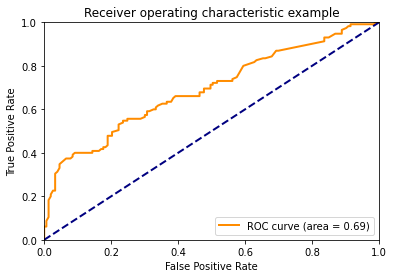

In [39]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [40]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_map,Age_Fill,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,22.0,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,38.0,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,26.0,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,35.0,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,35.0,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [41]:
titanic_with_dummies['Age_Fill'] = titanic_with_dummies[["Age_Fill", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age_Fill"].transform(lambda x: x.fillna(x.mean()))

In [42]:
titanic_with_dummies['Age_Fill']

PassengerId
1      22.00
2      38.00
3      26.00
4      35.00
5      35.00
       ...  
887    27.00
888    19.00
889    21.75
890    26.00
891    32.00
Name: Age_Fill, Length: 891, dtype: float64

In [43]:
titanic_with_dummies.isnull().sum()

Survived        0
Name            0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Sex_map         0
Age_Fill        0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
dtype: int64

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [45]:
titanic_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Name        891 non-null    object 
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Ticket      891 non-null    object 
 6   Fare        891 non-null    float64
 7   Cabin       204 non-null    object 
 8   Sex_map     891 non-null    int64  
 9   Age_Fill    891 non-null    float64
 10  Sex_female  891 non-null    uint8  
 11  Sex_male    891 non-null    uint8  
 12  Embarked_C  891 non-null    uint8  
 13  Embarked_Q  891 non-null    uint8  
 14  Embarked_S  891 non-null    uint8  
 15  Pclass_1    891 non-null    uint8  
 16  Pclass_2    891 non-null    uint8  
 17  Pclass_3    891 non-null    uint8  
dtypes: float64(3), int64(4), object(3), uint8(8)
memory usage: 123.5+ KB


In [46]:
# ANSWER
# Set Feature Both Numerical, Categorical


X = titanic_with_dummies[["Age_Fill", "Parch", "SibSp","Pclass_1","Pclass_2","Pclass_3"]]
y = titanic_with_dummies['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Build model
LogReg2 = LogisticRegression()

# Fit Model
LogReg2.fit(X_train, y_train)

# Score
y_pred = LogReg2.predict(X_test)

test_accuracy_score = LogReg2.score(X_test, y_test)

print('accuracy_score for the test data', test_accuracy_score)

accuracy_score for the test data 0.6567164179104478


Plot the ROC curve for the new model:

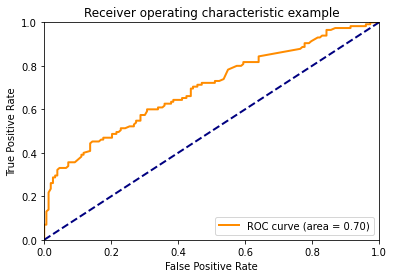

In [47]:
# ANSWER

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds2 = LogReg2.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds2)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

In [48]:
titanic_with_dummies.isnull().sum()

Survived        0
Name            0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Sex_map         0
Age_Fill        0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
dtype: int64

In [49]:
titanic_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Name        891 non-null    object 
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Ticket      891 non-null    object 
 6   Fare        891 non-null    float64
 7   Cabin       204 non-null    object 
 8   Sex_map     891 non-null    int64  
 9   Age_Fill    891 non-null    float64
 10  Sex_female  891 non-null    uint8  
 11  Sex_male    891 non-null    uint8  
 12  Embarked_C  891 non-null    uint8  
 13  Embarked_Q  891 non-null    uint8  
 14  Embarked_S  891 non-null    uint8  
 15  Pclass_1    891 non-null    uint8  
 16  Pclass_2    891 non-null    uint8  
 17  Pclass_3    891 non-null    uint8  
dtypes: float64(3), int64(4), object(3), uint8(8)
memory usage: 123.5+ KB


In [50]:
# ANSWER

# First, drop null columns and string values : Name, Ticket, Cabin and Age. At this stage too much work with Cabin 

titanic_with_dummies_dropped = titanic_with_dummies.drop(['Name', 'Ticket', 'Age', 'Cabin'], axis = 1)

In [51]:
# Now build the model with whole dataset

y = titanic_with_dummies_dropped['Survived']
X = titanic_with_dummies_dropped.drop('Survived', axis = 1)

LogReg3 = LogisticRegression(max_iter = 5000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit the new model
LogReg3.fit(X_train, y_train)

# Predict on the test set
y_pred = LogReg3.predict(X_test)

# Get the score
test_accuracy_score = LogReg3.score(X_test, y_test)

# Print the score
print('accuracy_score for the test data', test_accuracy_score)

accuracy_score for the test data 0.7798507462686567


## Interpreing after adding new features to the model:

### Model Score for LogReg2 = 0.65 and LogReg3 = 0.77. Adding new columns seem to improve the score.

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

#### 1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

In [50]:
# Trying with no random state

y = titanic_with_dummies_dropped['Survived']
X = titanic_with_dummies_dropped.drop('Survived', axis = 1)

LogReg3 = LogisticRegression(max_iter = 5000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Fit the new model
LogReg3.fit(X_train, y_train)

# Predict on the test set
y_pred = LogReg3.predict(X_test)

# Get the score
test_accuracy_score = LogReg3.score(X_test, y_test)

# Print the score
print('accuracy_score for the test data', test_accuracy_score)

accuracy_score for the test data 0.835820895522388


In [51]:
# Trying with a different random state

y = titanic_with_dummies_dropped['Survived']
X = titanic_with_dummies_dropped.drop('Survived', axis = 1)

LogReg3 = LogisticRegression(max_iter = 5000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

# Fit the new model
LogReg3.fit(X_train, y_train)

# Predict on the test set
y_pred = LogReg3.predict(X_test)

# Get the score
test_accuracy_score = LogReg3.score(X_test, y_test)

# Print the score
print('accuracy_score for the test data', test_accuracy_score)

accuracy_score for the test data 0.8171641791044776


### Answer : Using different random state gives different test scores.

#### 2.Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

In [77]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(LogReg3, X_train, y_train, cv = 5)

print(cv_results)
print('Average 5-Fold CV Score : {}'.format(np.mean(cv_results)))

[0.776      0.904      0.776      0.76612903 0.84677419]
Average 5-Fold CV Score : 0.8137806451612905


### Answer: Score comparison with the example above: Accuracy has not improved

#### 3. Look at the `fpr` & `tpr` vectors for the best model.

In [78]:
y_pred_class = LogReg3.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[139  18]
 [ 31  80]]


In [79]:
# Print Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



C:\Users\isabe\anaconda3_1\envs\iod\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


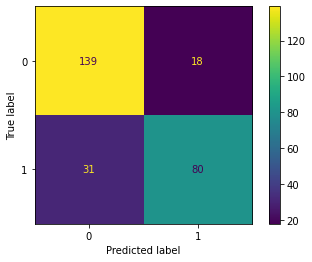

In [80]:
# Create a confusion matrix plot
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LogReg3, X_test, y_test)  
plt.show()

## Isabelle' s BONUS - Trying Lasso on the data for feature selection

In [81]:
from sklearn.linear_model import Lasso

In [82]:
names = titanic_with_dummies_dropped.drop('Survived', axis = 1).columns

In [83]:
lasso = Lasso(alpha = 0.1)

In [84]:
lasso_coef = lasso.fit(X, y).coef_

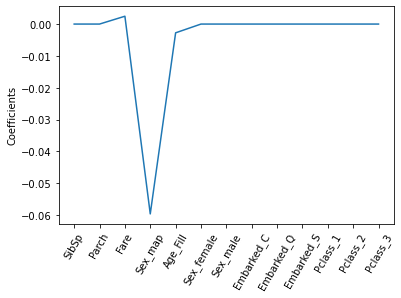

In [85]:
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel('Coefficients')
plt.show()

## Bonus - Hyperparameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
#logreg3 = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(LogReg3, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.8137677419354838




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



